In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from helpers.SimulationAnalysis import readHlist

In [12]:
fields = ['scale','id', 'upid', 'pid', 'mvir', 'rvir', 'vmax', 'vpeak', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'M200c', 'depth_first_id','scale_of_last_MM']
halos = readHlist('datafiles/hlist_1.00000_TL.list', fields)

In [13]:
#resolution cut (important to apply)
halos = halos[halos['vpeak']>10]

x = (halos['x'] - halos[1]['x'])*1000/0.7
y = (halos['y'] - halos[1]['y'])*1000/0.7
z = (halos['z'] - halos[1]['z'])*1000/0.7
r = np.sqrt(x**2 + y**2 + z**2)

close_cut = r > 300
far_cut = r < 2000

In [24]:
np.nonzero(np.argsort(halos['mvir'][::-1]) - np.array(range(len(halos))))
np.concatenate((halos[0],halos[2:]))

ValueError: zero-dimensional arrays cannot be concatenated

(-2500, 2500)

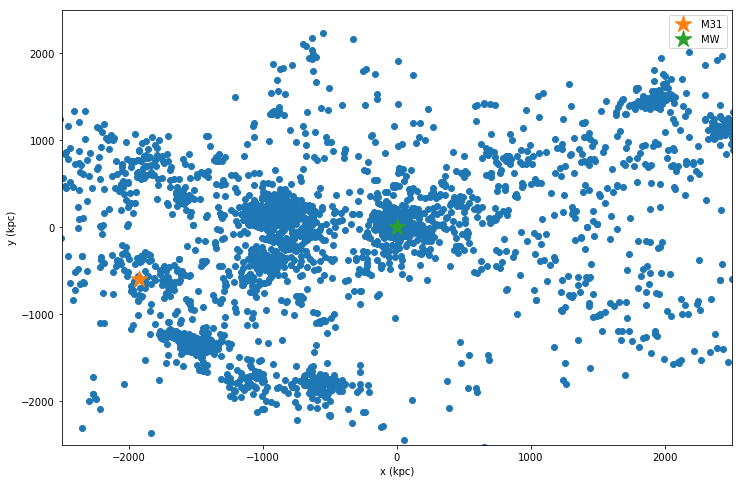

In [14]:
#spatial distribution
plt.figure(figsize=(12,8))
#plt.scatter(x[far_cut & close_cut],y[far_cut & close_cut],zorder=1,s=20)
plt.scatter(x,y)
plt.scatter(x[0],y[0],marker='*',s=300,label='M31',zorder=5)
plt.scatter(x[1],y[1],marker='*',s=300,label='MW', zorder=5)
#plt.scatter(x[~close_cut],y[~close_cut],c='0.5',s=5,zorder=0)
#plt.scatter(x[~far_cut],y[~far_cut],c='0.5',s=5,zorder=0)
plt.legend()
plt.xlabel('x (kpc)')
plt.ylabel('y (kpc)')
plt.xlim(-2500, 2500)
plt.ylim(-2500, 2500)

In [19]:
#distance between M31 and MW in kpc
print(1000.*np.sqrt((halos['x'][0]-halos['x'][1])**2+(halos['y'][0]-halos['y'][1])**2+(halos['z'][0]-halos['z'][1])**2))

2307.820720268366


In [35]:
#Load interpolator
with open('./interpolator.pkl', 'rb') as interp:
    vpeak_Mr_interp = pickle.load(interp)

In [37]:
Mr = vpeak_Mr_interp(halos['vpeak'],0.2)

(array([  7.,  13.,   9.,  19.,  41.,  53.,  96., 124., 199., 282.]),
 array([-18.12015533, -15.9890187 , -13.85788208, -11.72674545,
         -9.59560883,  -7.4644722 ,  -5.33333557,  -3.20219895,
         -1.07106232,   1.0600743 ,   3.19121093]),
 <a list of 10 Patch objects>)

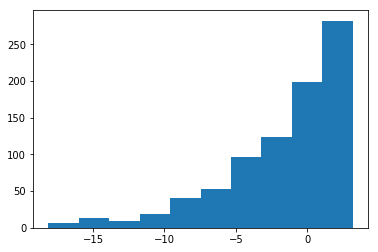

In [40]:
plt.hist(Mr)